# E KNN and K-means CIFAR
_5 points_

transform cifar-10 to grayscale. 

- Does knn work similarly good?
- Does k-means work similarly good?
- Demonstrate this similar to  B, C and D <br><br>

## Solution

In [67]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import f1_score
import skimage as ski
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
plt.gray()

<Figure size 432x288 with 0 Axes>

In [7]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [8]:
# transform to grayscale
x_train_bw = ski.color.rgb2gray(x_train)
x_test_bw = ski.color.rgb2gray(x_test)

# flatten the grayscale dataset
x_train_flat = x_train_bw.reshape([x_train.shape[0],
                              x_train.shape[1] * x_train.shape[2]])
x_test_flat = x_test_bw.reshape([x_test.shape[0],
                           x_test.shape[1] * x_test.shape[2]])
# flattening the y_arrays
y_train = y_train.ravel()
y_test = y_test.ravel()
x_train_bw.shape

(50000, 32, 32)

In [9]:
class_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

### Testing Knn

In [10]:
knn_2 = KNeighborsClassifier(n_neighbors=2, n_jobs=-1)
knn_4 = KNeighborsClassifier(n_neighbors=4, n_jobs=-1)
knn_8 = KNeighborsClassifier(n_neighbors=8, n_jobs=-1)

In [11]:
# subsampling with 10000 images
knn_2.fit(x_train_flat[:10000], y_train[:10000])
knn_4.fit(x_train_flat[:10000], y_train[:10000])
knn_8.fit(x_train_flat[:10000], y_train[:10000])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=8, p=2,
           weights='uniform')

In [12]:
knn_2_predictions = knn_2.predict(x_test_flat[:2000])
knn_4_predictions = knn_4.predict(x_test_flat[:2000])
knn_8_predictions = knn_8.predict(x_test_flat[:2000])

In [13]:
# As in the previous examples we will use the error rate as 1 - f1_score for all models

knn_2_f1_score = f1_score(y_test[:2000], knn_2_predictions, average="micro")
knn_4_f1_score = f1_score(y_test[:2000], knn_4_predictions, average="micro")
knn_8_f1_score = f1_score(y_test[:2000], knn_8_predictions, average="micro")
print("Error rate for knn {}: {}".format(2, (1 - knn_2_f1_score)))
print("Error rate for knn {}: {}".format(4, (1 - knn_4_f1_score)))
print("Error rate for knn {}: {}".format(8, (1 - knn_8_f1_score)))

Error rate for knn 2: 0.798
Error rate for knn 4: 0.772
Error rate for knn 8: 0.7685


In [82]:
# Creating the individual error rates for each label using the f1_score

prediction_array = [knn_2_predictions, knn_4_predictions, knn_8_predictions]
results = [] # will later contain the results of all three models
for i in range(len(prediction_array)):
    predictions = prediction_array[i]
    result_array = []
    for i in range(10):
        indices = np.where(y_test[:2000] ==i)[0]
        true_values = y_test[indices] # shorten the y_test array to the specified indices
        pred_values = predictions[indices]
        result_array.append(1 - f1_score(true_values, pred_values, average="micro"))
    results.append(result_array)
print("Error rates by model and label")
knn_df = pd.DataFrame(np.array(results).T, columns=["Knn_2", "Knn_4", "Knn_8"], index=class_names)
knn_df

Error rates by model and label


,Knn_2,Knn_4,Knn_8
airplane,0.505102,0.612245,0.637755
automobile,0.818182,0.833333,0.924242
bird,0.666667,0.646154,0.610256
cat,0.849246,0.899497,0.909548
deer,0.797980,0.707071,0.676768
dog,0.935135,0.935135,0.940541
frog,0.907407,0.800926,0.787037
horse,0.891192,0.875648,0.870466
ship,0.645161,0.516129,0.460829
truck,0.970443,0.921182,0.901478


### Testing Kmeans

In [16]:
kmeans_10_iter = KMeans(n_clusters=10, max_iter=10, n_jobs=-1).fit(x_train_flat[:10000]) # n_jobs = -1 to use all cores for calculation
kmeans_100_iter = KMeans(n_clusters=10, max_iter=100, n_jobs=-1).fit(x_train_flat[:10000])
kmeans_1000_iter = KMeans(n_clusters=10, max_iter=1000, n_jobs=-1).fit(x_train_flat[:10000])

In [17]:
# visualize how many iterations were actually made
print(kmeans_10_iter.n_iter_)
print(kmeans_100_iter.n_iter_)
print(kmeans_1000_iter.n_iter_)

9
53
80


In [18]:
kmeans_10_scores = []
kmeans_100_scores = []
kmeans_1000_scores = []

# create empty multidimensional arrays used for better indexing
for i in range(10):
    kmeans_10_scores.append([])
    kmeans_100_scores.append([])
    kmeans_1000_scores.append([])

# filling the score_arrays (lists) with the corresponding true labels (y_test)
#kmeans_10
count = 0
for value in kmeans_10_iter.labels_:
    kmeans_10_scores[value].append(y_train[count])
    count += 1

#kmeans_100
count = 0
for value in kmeans_100_iter.labels_:
    kmeans_100_scores[value].append(y_train[count])
    count += 1

#kmeans_1000
count = 0
for value in kmeans_1000_iter.labels_:
    kmeans_1000_scores[value].append(y_train[count])
    count += 1

In [19]:
# calculate a distribution between the ten classes
kmeans_10_clusters = []
kmeans_100_clusters = []
kmeans_1000_clusters = []
for i in range(10):
    # 10 iterations
    local_array = np.bincount(kmeans_10_scores[:][i])
    kmeans_10_clusters.append(local_array)
    # 100 iterations
    local_array = np.bincount(kmeans_100_scores[:][i])
    kmeans_100_clusters.append(local_array)
    #1000 iterations
    local_array = np.bincount(kmeans_1000_scores[:][i])
    kmeans_1000_clusters.append(local_array)

In [20]:
# Calculating the majority label in each cluster and its percentage
print("Kmeans with 10 iterations\n")
count = 0
labels = np.arange(10)
majority_labels_10 = []
percentages_maj_cluster_10 = []
for array in kmeans_10_clusters:
    maximum = np.where(array == max(array))[0]
    if len(maximum) == 1:
        print("Cluster: {} => majority label: {}".format(count, maximum[0]))    
        majority_labels_10.append(maximum[0])
        percentages_maj_cluster_10.append(max(array) / sum(array))
    else: # catch the case that the maximum exists more than once in a cluster
        print("Multiple maximum detected! No value has been added to the result set!")
    count += 1
differences_10_iter = np.where(np.isin(labels, majority_labels_10) == False)[0]
print("The following numbers have no own cluster: {}".format(differences_10_iter))
#print(percentages_maj_cluster_10)

Kmeans with 10 iterations

Cluster: 0 => majority label: 9
Cluster: 1 => majority label: 5
Cluster: 2 => majority label: 8
Cluster: 3 => majority label: 2
Cluster: 4 => majority label: 6
Cluster: 5 => majority label: 6
Cluster: 6 => majority label: 8
Cluster: 7 => majority label: 7
Cluster: 8 => majority label: 0
Cluster: 9 => majority label: 4
The following numbers have no own cluster: [1 3]


In [21]:
print("Kmeans with 100 iterations\n")
count = 0
labels = np.arange(10)
majority_labels_100 = []
percentages_maj_cluster_100 = []
for array in kmeans_100_clusters:
    maximum = np.where(array == max(array))[0]
    if len(maximum) == 1:
        print("Cluster: {} => majority label: {}".format(count, maximum[0]))    
        majority_labels_100.append(maximum[0])
        percentages_maj_cluster_100.append(max(array) / sum(array))
    else:
        print("Multiple maximum detected! No value has been added to the result set!")
    count += 1
differences_100_iter = np.where(np.isin(labels, majority_labels_100) == False)[0]
print("The following numbers have no own cluster: {}".format(differences_100_iter))
#print(percentages_maj_cluster_100)

Kmeans with 100 iterations

Cluster: 0 => majority label: 7
Cluster: 1 => majority label: 9
Cluster: 2 => majority label: 8
Cluster: 3 => majority label: 2
Cluster: 4 => majority label: 9
Cluster: 5 => majority label: 6
Cluster: 6 => majority label: 6
Cluster: 7 => majority label: 4
Cluster: 8 => majority label: 0
Cluster: 9 => majority label: 8
The following numbers have no own cluster: [1 3 5]


In [22]:
print("Kmeans with 1000 iterations\n")
count = 0
labels = np.arange(10)
majority_labels_1000 = []
percentages_maj_cluster_1000 = []
for array in kmeans_1000_clusters:
    maximum = np.where(array == max(array))[0]
    if len(maximum) == 1:
        print("Cluster: {} => majority label: {}".format(count, maximum[0]))    
        majority_labels_1000.append(maximum[0])
        percentages_maj_cluster_1000.append(max(array) / sum(array))
    else:
        print("Multiple maximum detected! No value has been added to the result set!")
    count += 1
differences_1000_iter = np.where(np.isin(labels, majority_labels_1000) == False)[0]
print("The following numbers have no own cluster: {}".format(differences_1000_iter))
#print(percentages_maj_cluster_1000)

Kmeans with 1000 iterations

Cluster: 0 => majority label: 7
Cluster: 1 => majority label: 6
Cluster: 2 => majority label: 8
Cluster: 3 => majority label: 2
Cluster: 4 => majority label: 8
Cluster: 5 => majority label: 9
Cluster: 6 => majority label: 0
Cluster: 7 => majority label: 4
Cluster: 8 => majority label: 6
Cluster: 9 => majority label: 9
The following numbers have no own cluster: [1 3 5]


In [25]:
combined_percentages = [percentages_maj_cluster_10, percentages_maj_cluster_100, percentages_maj_cluster_1000]
df0 = pd.DataFrame(np.array(combined_percentages).T, columns=["10", "100", "1000"])
np.array(combined_percentages).T
df0

,10,100,1000
0,0.307389,0.156115,0.160058
1,0.229572,0.301904,0.152614
2,0.136601,0.153125,0.320363
3,0.172161,0.165730,0.164026
4,0.150641,0.179379,0.150855
5,0.222607,0.226619,0.297696
6,0.291925,0.150927,0.333901
7,0.191033,0.192703,0.193214
8,0.320301,0.334471,0.224321
9,0.198777,0.317010,0.179916


### Task D: What is difficult to predict?

In [29]:
# create a new knn model
knn_3 = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
knn_3.fit(x_train_flat[:10000], y_train[:10000])
knn_3_predictions = knn_3.predict(x_test_flat[:2000])

In [30]:
# f1 score of the knn model
print(f1_score(y_test[:2000], predictions[:2000], average="micro"))

0.2315


[0 8 8 8 4 2 4 2 2 2 2 4 5 6 0 8 2 3 1 3]
[3 8 8 0 6 6 1 6 3 1 0 9 5 7 9 8 5 7 8 6]
Prediction: airplane
Real value: cat


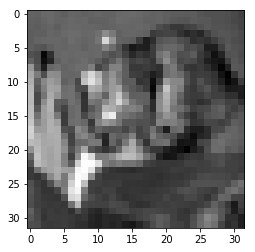

Prediction: ship
Real value: airplane


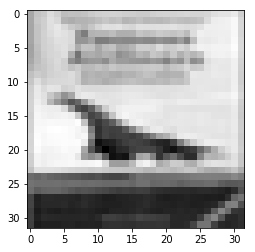

Prediction: deer
Real value: frog


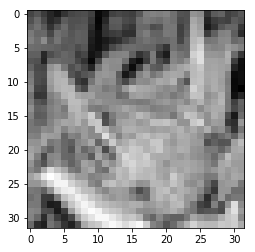

Prediction: bird
Real value: frog


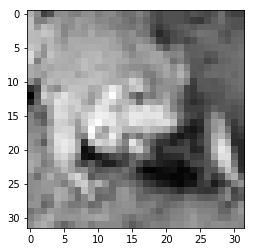

Prediction: deer
Real value: automobile


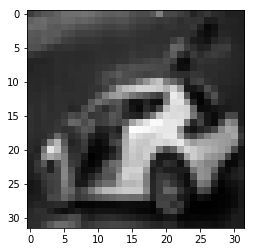

Prediction: bird
Real value: frog


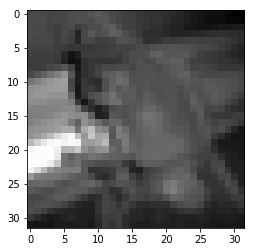

Prediction: bird
Real value: cat


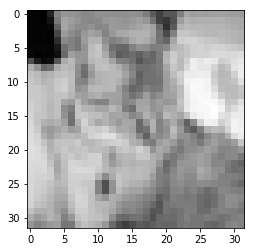

Prediction: bird
Real value: automobile


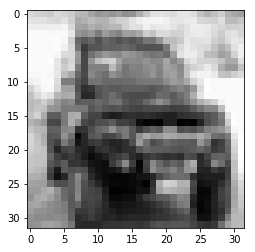

Prediction: bird
Real value: airplane


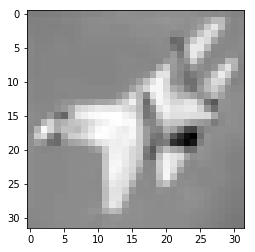

Prediction: deer
Real value: truck


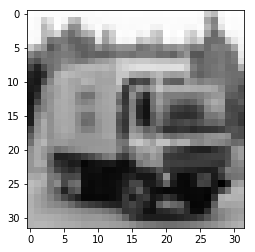

Prediction: frog
Real value: horse


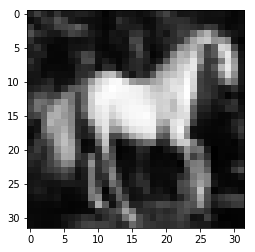

Prediction: airplane
Real value: truck


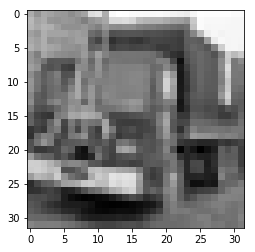

Prediction: bird
Real value: dog


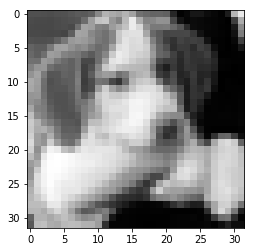

Prediction: cat
Real value: horse


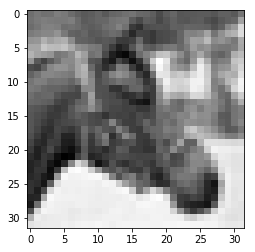

Prediction: automobile
Real value: ship


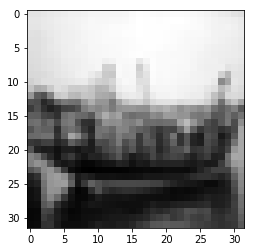

Prediction: cat
Real value: frog


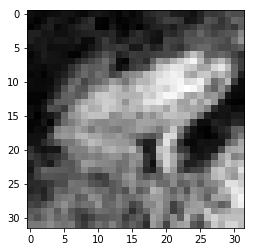

Prediction: airplane
Real value: horse


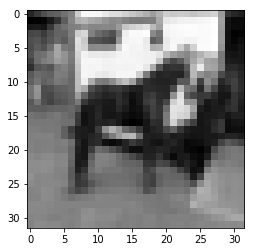

Prediction: bird
Real value: deer


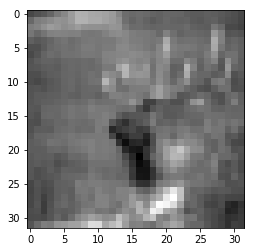

Prediction: deer
Real value: truck


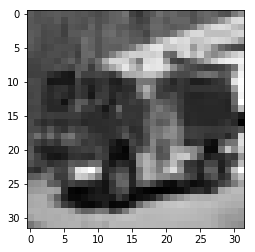

Prediction: airplane
Real value: dog


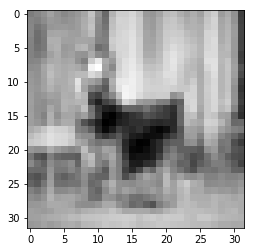

Prediction: ship
Real value: bird


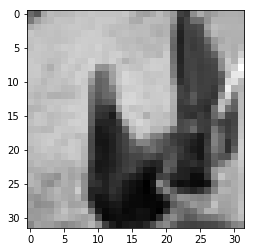

Prediction: bird
Real value: deer


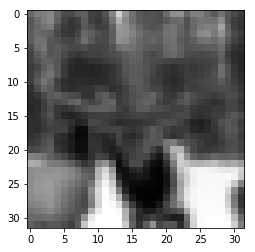

Prediction: frog
Real value: truck


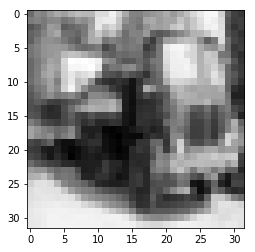

Prediction: bird
Real value: frog


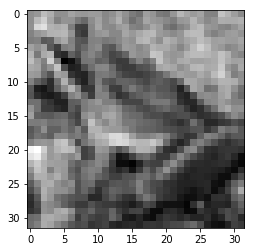

Prediction: airplane
Real value: frog


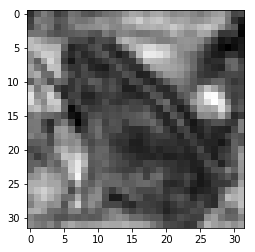

In [69]:
# error contains all indices where the predictions do not match the real labels
error = []
count = 0
for value in knn_3_predictions:
    if value != y_test[count]:
        error.append(count)
    count += 1
#error = np.where(knn_3_predictions == y_test)
print(knn_3_predictions[:20])
print(y_test[:20])
#print(error)
# looking at example images that were not identified correctly
for value in error[:25]:
    x_val = value
    print("Prediction: {}".format(class_names[knn_3.predict([x_test_bw[x_val].reshape(32*32)])[0]]))
    print("Real value: {}".format(class_names[y_test[x_val]]))
    plt.imshow(x_test_bw[x_val])
    plt.show()
    
#print("Knn Labels not recognized: {}".format(np.bincount(y_test[error])))
#print("Knn Labels wrongly classified: {}".format(np.bincount(predictions[error])))

Real value: cat


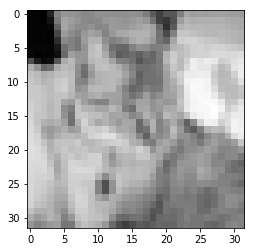

Real value: deer


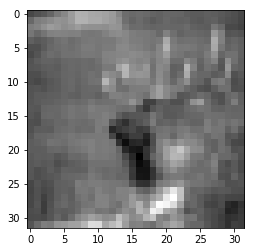

Real value: deer


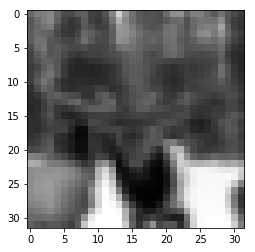

In [81]:
arr = [6, 17, 21]
strings = ["cat", "deer", "deer"]
for i in arr:
    print("Real value: {}".format(strings.pop(0)))
    plt.imshow(x_test_bw[error[i]])
    plt.show()

# Answer

## Evaluating similarities on knn and kmeans compared to the MNIST dataset

In comparison to the MNIST dataset, the CIPHER10 dataset has very bad results. While the error rate for all three knns on the MNIST dataset was around 3%, the CIPHER10 dataset has errors around 76-79%.<br>
Also the kmeans model did not perform better because more categories have no own cluster and the individual percentages in the clusters decreased, meaning the predicted values inside a cluster are close next to each other leading to many false predicitons.<br>
At this point we have to say that the CIPHER10 dataset was only used as a subsample because of runtime issues (10k training, 2k test). The results might differ if the whole dataset is used. (We try doing this on the cloud if the time is enough!).

## Ex. B for CIPHER10

The CIPHER10 has the following error rates for the different knn models:<br>
Error rate for knn 2: 0.798<br>
Error rate for knn 4: 0.772<br>
Error rate for knn 8: 0.7685<br>

The individual error rates can be seen below. There, one can see that especially the most classes perform wery bad, so we want to highlight the ones that were not completely false. For knn = 2 the class airplane performed best with around 50% false predictions; for knn = 4 the class ship was around 50% failure and for knn = 8 the class ship has below 50% failure.<br>
All other classes have higher error rates, going up to 97% (knn = 2 class: truck).

In contrast to the MNIST dataset, one can see a solid difference by changing the value for k. Firstly, with a rising k (in our example from 2 to 4 to 8) the overall error rate decreases; nevertheless it is a very horrible score.
Furthermore, with a rising k the errors in some classes constantly increase or decrease; for example increasing errors for rising k in classes "cat" and "dog" and decreasing errors for rising k in "bird", "deer" and "ship".

In [83]:
knn_df

,Knn_2,Knn_4,Knn_8
airplane,0.505102,0.612245,0.637755
automobile,0.818182,0.833333,0.924242
bird,0.666667,0.646154,0.610256
cat,0.849246,0.899497,0.909548
deer,0.797980,0.707071,0.676768
dog,0.935135,0.935135,0.940541
frog,0.907407,0.800926,0.787037
horse,0.891192,0.875648,0.870466
ship,0.645161,0.516129,0.460829
truck,0.970443,0.921182,0.901478


## Ex. C for CIPHER10

Majority classes for each cluster:<br>
<b>For max_iterations = 10</b><br>
Cluster: 0 => majority label: 9
Cluster: 1 => majority label: 5
Cluster: 2 => majority label: 8
Cluster: 3 => majority label: 2
Cluster: 4 => majority label: 6
Cluster: 5 => majority label: 6
Cluster: 6 => majority label: 8
Cluster: 7 => majority label: 7
Cluster: 8 => majority label: 0
Cluster: 9 => majority label: 4<br><br>

Majority classes for each cluster:<br>
<b>For max_iterations = 100</b><br>
Cluster: 0 => majority label: 7
Cluster: 1 => majority label: 9
Cluster: 2 => majority label: 8
Cluster: 3 => majority label: 2
Cluster: 4 => majority label: 9
Cluster: 5 => majority label: 6
Cluster: 6 => majority label: 6
Cluster: 7 => majority label: 4
Cluster: 8 => majority label: 0
Cluster: 9 => majority label: 8<br><br>

Majority classes for each cluster:<br>
<b>For max_iterations = 1000</b><br>
Cluster: 0 => majority label: 7
Cluster: 1 => majority label: 6
Cluster: 2 => majority label: 8
Cluster: 3 => majority label: 2
Cluster: 4 => majority label: 8
Cluster: 5 => majority label: 9
Cluster: 6 => majority label: 0
Cluster: 7 => majority label: 4
Cluster: 8 => majority label: 6
Cluster: 9 => majority label: 9<br><br>

<b>Categories that have no own cluster:</b><br>
max_iter=10: Classes 1 and 3<br>
max_iter=100: Classes 1, 3 and 5<br>
max_iter=1000: Classes 1, 3 and 5<br><br>

### Majority percentage in the cluster (table below)
One can see that the classes in many clusters have to be very even distributed, if the maximum class only reaches percentages around 13-19%. On the other hand, in some classes the maximum category is far stronger (>30%); however, compared to the MNIST dataset where the maximum categories reached up to 90% and never fell below 35% this values are a good proof that the Kmeans model is not very effective for this task/dataset.

In [84]:
df0

,10,100,1000
0,0.307389,0.156115,0.160058
1,0.229572,0.301904,0.152614
2,0.136601,0.153125,0.320363
3,0.172161,0.165730,0.164026
4,0.150641,0.179379,0.150855
5,0.222607,0.226619,0.297696
6,0.291925,0.150927,0.333901
7,0.191033,0.192703,0.193214
8,0.320301,0.334471,0.224321
9,0.198777,0.317010,0.179916


## Ex. D for CIPHER10